# Module 09: *k*-Nearest Neighbors

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following :
Question 1. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 2. Evaluate the prediction accuracy, using the best value of k.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [8]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]


#Visualize the pairwise relationships between the features
#Note: seaborn has a pairplot which is useful.


## Question 1: Choose *K*

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 10 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*.

In [9]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
                                        #TODO: enter the appropriate values to partition the data, 
                                        #and ensure your results are reproducible
                                        #and obtain stratified samples
                                                    X,              #the input features
                                                    y,              #the label
                                                    test_size=0.25,  #set aside 25% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                        ) 

#build the k-nn model, experiment with different values of k and plot the results

#identify a suitable value of k
predictions = {}

for k in range(3, 50, 2): #increment k by 2
    knn = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)

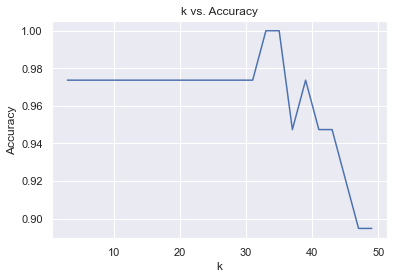

In [12]:
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.title('k vs. Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.show()

In [11]:
# **Summary:** As the value of k increased the overall accuracy of the model decreased.
# It began with a solid 97% for the first 33 but then 
# When k was 33 or 35, the model produced the highest accuracy on the test set at `100%`. 
# It then dipped down to the less than 90% as k kept increasing so I would recommend k to be either a number from 
# 33 to 35. 



## Question 2: Evaluate the Results
Display the classification report for the knn model thats based on your recommended value of k. Evaluate the report and explain the results. 

In [16]:
#get the classification report for the best value of k
knn_34 = KNeighborsClassifier(n_neighbors = 35) #initialize the classifier and set the number of neighbors
knn_34.fit(X_train, y_train)
y_pred = knn_34.predict(X_test)

target_names = ['Iris Setosa', 'Iris Virginica', 'Iris Versicolor']
print(classification_report(y_test, y_pred, target_names = target_names))

                 precision    recall  f1-score   support

    Iris Setosa       1.00      1.00      1.00        13
 Iris Virginica       1.00      1.00      1.00        13
Iris Versicolor       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [17]:
# With a value of 35 for k, the classification reports shows an accuracy of 100%. 